In [145]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

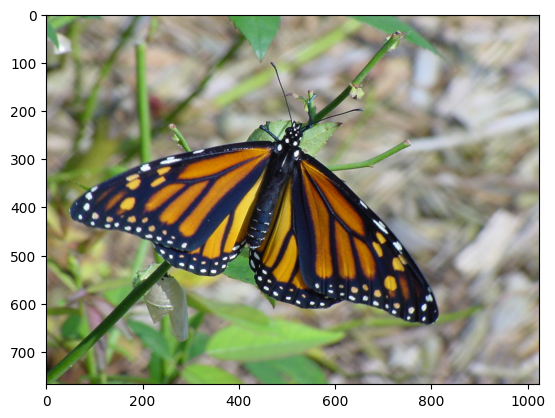

[[[139 133 133]
  [139 135 132]
  [138 137 132]
  ...
  [143 147 148]
  [142 146 145]
  [141 145 144]]

 [[133 133 131]
  [135 136 131]
  [134 140 130]
  ...
  [144 148 147]
  [143 147 146]
  [142 146 145]]

 [[128 134 130]
  [129 136 129]
  [128 140 126]
  ...
  [144 148 147]
  [143 148 144]
  [142 147 143]]

 ...

 [[ 76 129  47]
  [ 77 130  48]
  [ 80 131  52]
  ...
  [167 162 156]
  [166 161 155]
  [165 160 154]]

 [[ 78 131  49]
  [ 81 134  52]
  [ 84 135  56]
  ...
  [165 160 154]
  [164 159 153]
  [164 159 153]]

 [[ 80 133  51]
  [ 83 135  53]
  [ 87 138  59]
  ...
  [163 158 152]
  [163 158 152]
  [163 158 152]]]


In [146]:
imBRG = cv2.imread("./leedsbutterfly/images/0010001.png")
imRGB = cv2.cvtColor(imBRG, cv2.COLOR_BGR2RGB)
plt.imshow(imRGB)
plt.show()

print(imRGB)

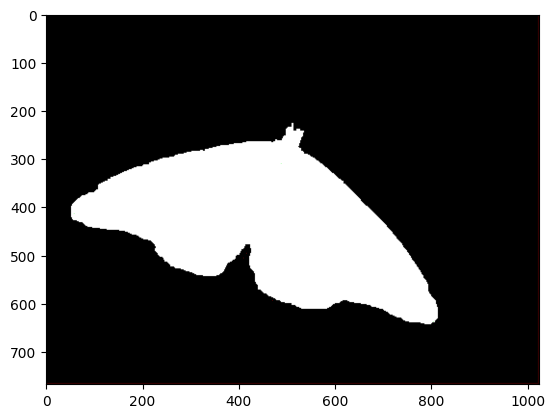

[[255   0   0]
 [  0   0   0]
 [255   0   0]
 ...
 [  0   0   0]
 [255   0   0]
 [  0   0   0]]
1024


In [147]:
seg = cv2.imread(".//leedsbutterfly/segmentations/0010001_seg0.png")
seg = cv2.cvtColor(seg, cv2.COLOR_BGR2RGB)
plt.imshow(seg)
plt.show()

print(seg[0])
print(len(seg[0]))

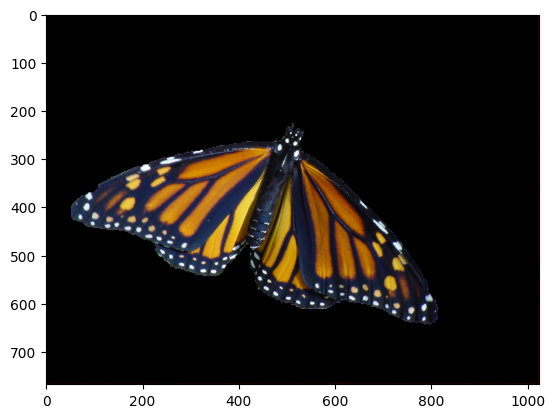

In [148]:
# Để trích xuất chỉ các pixel liên quan đến obj trong ảnh, ta có thể lấy  ảnh.*seg:

import numpy as np


def remove_zeros_numpy(array):

    return array[np.any(array != 0, axis=1)]


Obj = np.multiply(imRGB/255, seg/255)  # .* matlab

plt.imshow(Obj)
plt.show()

In [149]:
import os


def getPixelFromObj(path, folder, folder_seg):
    img_path = folder+"/"+path
    seg_path = folder_seg+"/"+path.split('.')[0] + "_seg0."+path.split('.')[1]

    imBRG = cv2.imread(img_path)
    imRGB = cv2.cvtColor(imBRG, cv2.COLOR_BGR2RGB)

    seg = cv2.imread(seg_path)
    seg = cv2.cvtColor(seg, cv2.COLOR_BGR2RGB)

    Obj = np.multiply(imRGB/255, seg/255)
    pixel_values_ehe = Obj.reshape((-1, 3))

    filtered_arr = pixel_values_ehe[~np.all(pixel_values_ehe == 0, axis=1)]
    return filtered_arr

In [164]:
# image_path = "./leedsbutterfly/images/0010025.png"
# imBRG = cv2.imread(image_path)
# test = cv2.cvtColor(imBRG, cv2.COLOR_BGR2RGB)
# test = test
# test_array = test.reshape((-1, 3))
# testnew = kmeans.cluster_centers_[kmeans.predict(test_array)]


# print(kmeans.predict(test_array))
# print(testnew.shape)

# testnew = np.reshape(testnew, np.shape(test)) / 255

# print(testnew.shape)
# plt.imshow(test)
# plt.show()
# plt.imshow(testnew)
# plt.show()


def clusterImage(clusterBuilder, image_path):
  imBRG = cv2.imread(image_path)
  test = cv2.cvtColor(imBRG, cv2.COLOR_BGR2RGB)
  test_array = test.reshape((-1, 3))

  
  testnew = clusterBuilder.cluster_centers_[clusterBuilder.predict(test_array/255)]
  testnew = np.reshape(testnew, np.shape(test))
  
  print(testnew)
  
  plt.imshow(test)
  plt.show()
  plt.imshow(testnew)
  plt.show()
  
  

In [151]:
# Phần này thực hiện phân cụm mầu sắc.
# Ở đây mỗi pixel (R, G, B) tương ứng với một mầu sắc.Để phân cụm mầu sắc, ta tập hợp mầu sắc của tất cả các ảnh lại.
# Nếu dùng tất cả các ảnh để tập hợp thành một vector, số lượng mầu sắc sẽ rất lớn.
# Do vậy ta chỉ cần dùng một tập nhỏ các pixel mầu sắc, lấy ngẫu nhiên từ tập ảnh dữ liệu.

# Chon ngau nhien 50 imgs từ tất cả các classs,  de tinh toan colors_centers:

import os
image_folder = "./leedsbutterfly/images"
seg_folder = "./leedsbutterfly/segmentations"

image_names = os.listdir("./leedsbutterfly/images")

# Lấy ngẫu nhiên 50 tên hình ảnh
random_image_names = np.random.choice(image_names, 10, replace=False)

all_pixels = []

# Đọc từng hình ảnh và thêm các pixel vào danh sách
for img_name in random_image_names:
    all_pixels.extend(getPixelFromObj(img_name, image_folder, seg_folder))

In [152]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
pixel_values = imRGB.reshape((-1, 3))

# Chọn số lượng cụm mong muốn

k = 7

# Áp dụng K-means
kmeans = KMeans(n_clusters=k)
kmeans.fit(all_pixels)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [153]:
# Các tâm cụm
cluster_centers = kmeans.cluster_centers_



print("Các tâm cụm:")
print(cluster_centers)



Các tâm cụm:
[[0.27528158 0.17174373 0.10104719]
 [0.62519061 0.50836228 0.32565718]
 [0.0574767  0.04786833 0.03169985]
 [0.92718269 0.87523996 0.74592507]
 [0.85362456 0.40651647 0.05080338]
 [0.86683869 0.70047967 0.38236074]
 [0.44969261 0.29897752 0.1612377 ]]


[[[0.62519061 0.50836228 0.32565718]
  [0.62519061 0.50836228 0.32565718]
  [0.62519061 0.50836228 0.32565718]
  ...
  [0.62519061 0.50836228 0.32565718]
  [0.62519061 0.50836228 0.32565718]
  [0.62519061 0.50836228 0.32565718]]

 [[0.62519061 0.50836228 0.32565718]
  [0.62519061 0.50836228 0.32565718]
  [0.62519061 0.50836228 0.32565718]
  ...
  [0.62519061 0.50836228 0.32565718]
  [0.62519061 0.50836228 0.32565718]
  [0.62519061 0.50836228 0.32565718]]

 [[0.62519061 0.50836228 0.32565718]
  [0.62519061 0.50836228 0.32565718]
  [0.62519061 0.50836228 0.32565718]
  ...
  [0.62519061 0.50836228 0.32565718]
  [0.62519061 0.50836228 0.32565718]
  [0.62519061 0.50836228 0.32565718]]

 ...

 [[0.44969261 0.29897752 0.1612377 ]
  [0.44969261 0.29897752 0.1612377 ]
  [0.44969261 0.29897752 0.1612377 ]
  ...
  [0.62519061 0.50836228 0.32565718]
  [0.62519061 0.50836228 0.32565718]
  [0.62519061 0.50836228 0.32565718]]

 [[0.44969261 0.29897752 0.1612377 ]
  [0.44969261 0.29897752 0.1612377 ]


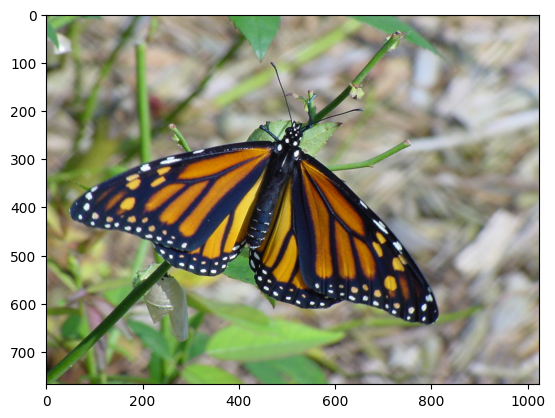

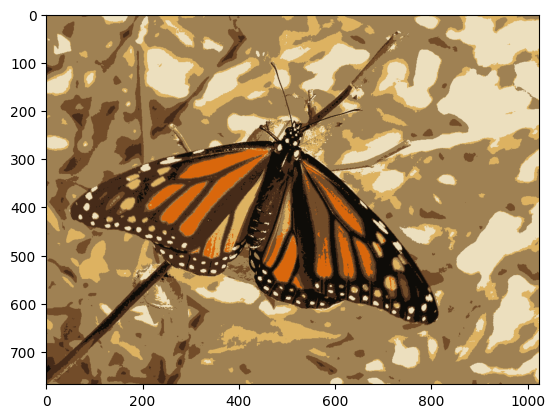

In [165]:
clusterImage(kmeans, "./leedsbutterfly/images/0010001.png" )